# Part A: Data preparation (Data Cleaning and Data Preprocessing)
## Step 1: Import original / source dataset.

In [1]:
import pandas as pd
import math
df = pd.read_csv("../Machine_Learning\Dataset\wet-bulb-temperature-hourly.csv",header='infer')
df

wbt_date  wbt_time  wet_bulb_temperature
0       1982-01-01         1                  24.7
1       1982-01-01         2                  24.5
2       1982-01-01         3                  24.3
3       1982-01-01         4                  24.2
4       1982-01-01         5                  24.2
...            ...       ...                   ...
351379  2022-01-31        20                  24.5
351380  2022-01-31        21                  24.5
351381  2022-01-31        22                  24.4
351382  2022-01-31        23                  24.5
351383  2022-01-31        24                  24.7

[351384 rows x 3 columns]

## Step 2: Remove unessary data set. Only requires last 5 years / 60 Months dataset.

As the original dataset is using hourly dataset, we will need to calculate how many hourly dataset is required of X months using the formula: 

number of dataset required = months * weeks * days * hours

In [2]:
months = 12
no_of_dataset_required = months * 4 * 7 *24
print('Number of dataset required = %d' % (no_of_dataset_required))
df_trimmed = df.tail(no_of_dataset_required-600)
df_trimmed

Number of dataset required = 8064


wbt_date  wbt_time  wet_bulb_temperature
343920  2021-03-27         1                  25.2
343921  2021-03-27         2                  25.1
343922  2021-03-27         3                  25.0
343923  2021-03-27         4                  24.8
343924  2021-03-27         5                  24.7
...            ...       ...                   ...
351379  2022-01-31        20                  24.5
351380  2022-01-31        21                  24.5
351381  2022-01-31        22                  24.4
351382  2022-01-31        23                  24.5
351383  2022-01-31        24                  24.7

[7464 rows x 3 columns]

## Step 3: Check for any duplicate data in original dataset

In [3]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df_trimmed.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 351384
Number of rows after discarding duplicates = 7464


## Step 4: Check for missing data <br>
i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [4]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 7464
Number of attributes = 3
Number of missing values:
	wbt_date: 0
	wbt_time: 0
	wet_bulb_temperature: 0


## Step 5: Drop missing data if any exists

In [5]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 7464
Number of rows after discarding missing values = 7464


## Step 6: Create visual representation / chart for trimmed dataset.

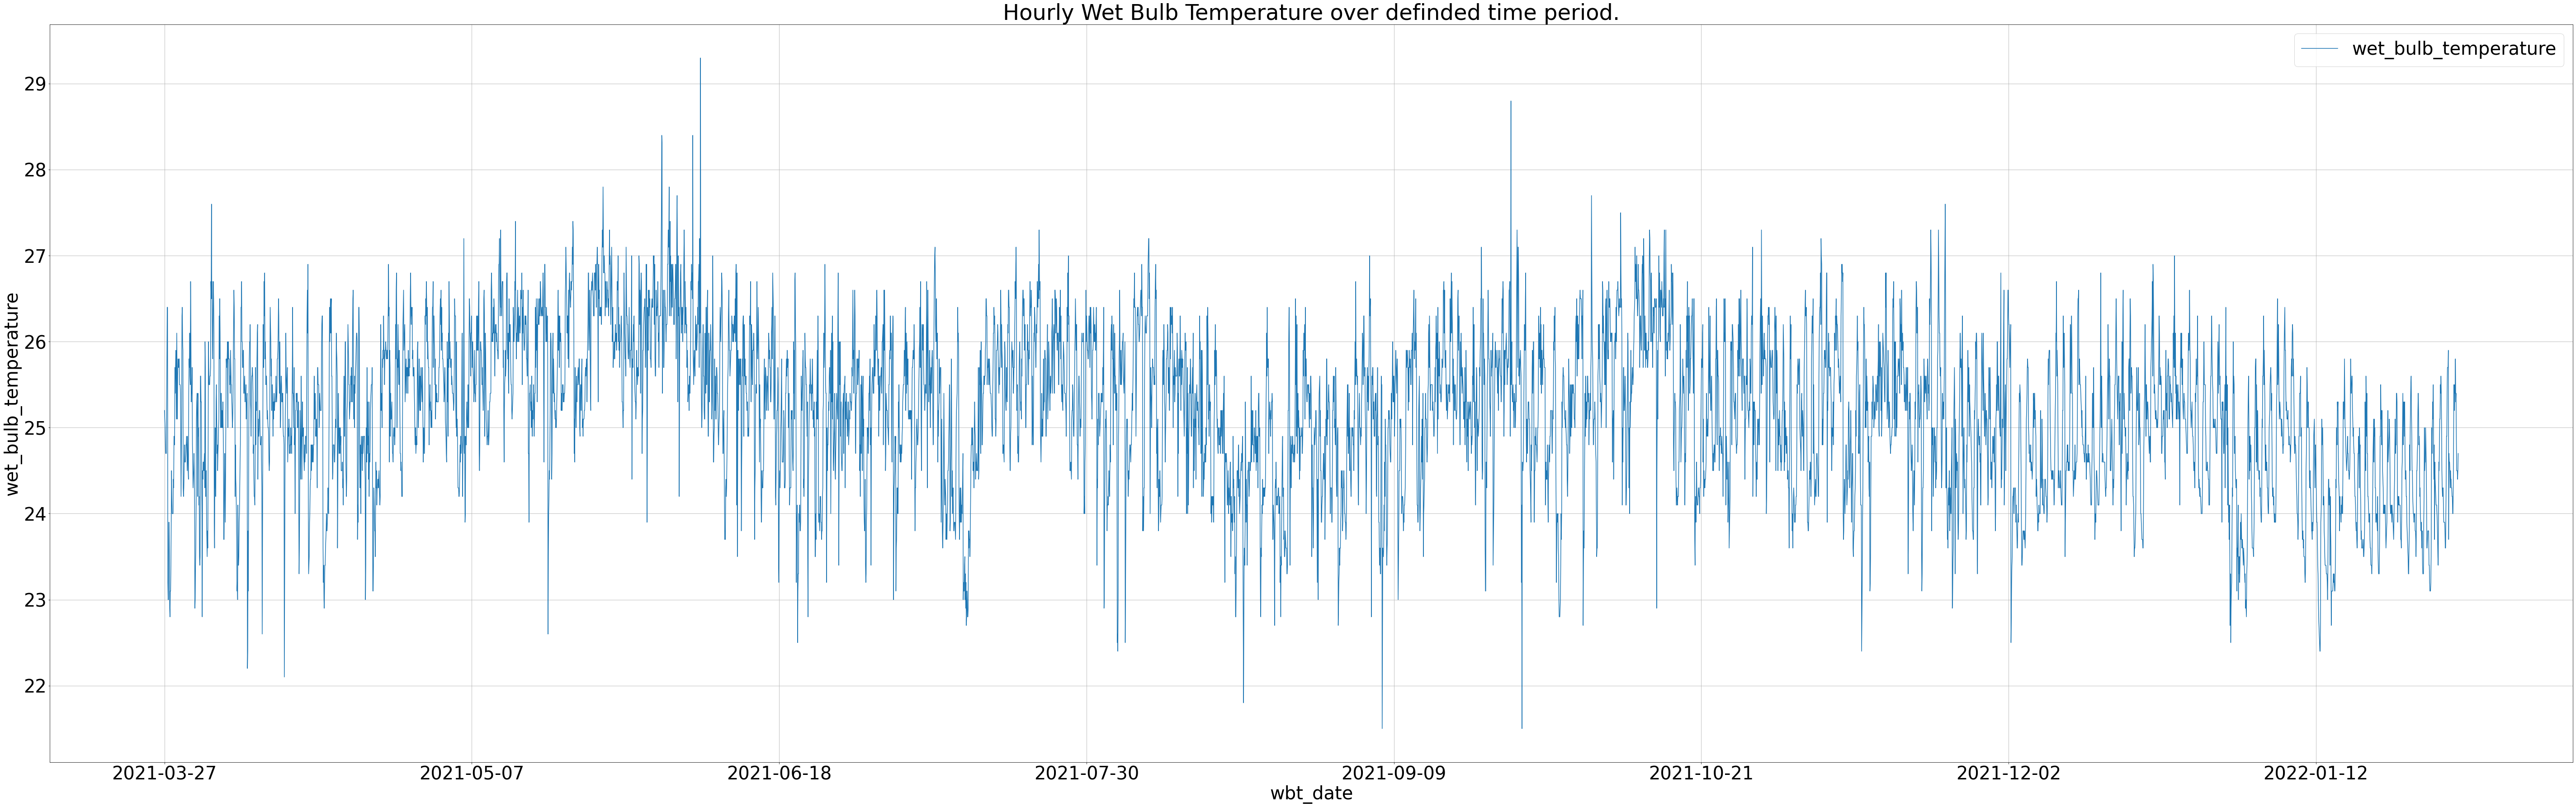

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})
df_drop_null.plot(x ='wbt_date', y='wet_bulb_temperature', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
plt.ylabel('wet_bulb_temperature')	
plt.xlabel('wbt_date')
plt.show()

## Step 7: Create labels for WBGT readings according to SAF Work Rest Cycle Guidelines


<img src="SAFWorkRestCycle.png" width=1080 height=400>


In [7]:
df_clean_data = df_drop_null.copy()
df_original_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 33.0
wbt_high_risk_red = 32.0
wbt_medium_risk_yellow = 31.0
wbt_low_risk_green = 30.0
wbt_low_risk_white =  29.9
risk_level = []

for row in df_original_threshold.index:
    if(df_original_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_red) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_medium_risk_yellow) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_original_threshold['wet_bulb_temperature'][row]>=wbt_low_risk_green) & (df_original_threshold['wet_bulb_temperature'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_original_threshold['wet_bulb_temperature'][row]<=wbt_low_risk_white)):
        risk_level.append('low_white')

df_original_threshold['risk_level'] = risk_level
df_original_threshold


wbt_date  wbt_time  wet_bulb_temperature risk_level
343920  2021-03-27         1                  25.2  low_white
343921  2021-03-27         2                  25.1  low_white
343922  2021-03-27         3                  25.0  low_white
343923  2021-03-27         4                  24.8  low_white
343924  2021-03-27         5                  24.7  low_white
...            ...       ...                   ...        ...
351379  2022-01-31        20                  24.5  low_white
351380  2022-01-31        21                  24.5  low_white
351381  2022-01-31        22                  24.4  low_white
351382  2022-01-31        23                  24.5  low_white
351383  2022-01-31        24                  24.7  low_white

[7464 rows x 4 columns]

## Step 7.a: Show count of each risk level

In [8]:
risk_high_black = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)


number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wet_bulb_temperature"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Original Threshold)= %d' % total)
print('Total count of clean data = %d' % df_original_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 0
Count of high risk (Red)= 0
Count of medium risk (Yellow)= 0
Count of low risk (Green)= 0
Count of low risk (White)= 7464
Total count of all risk (Original Threshold)= 7464
Total count of clean data = 7464
Highest WBGT readings = 29.30


# Step 8: Modify threshold limits

As the orginal dataset and SAF work rest cycle labels all of the data point as "Super Low Risk", no meaningful data / labels can be extrapolated.


Hence, lowering the threshold of "risk_high_black" according to the maximum WBGT datapoint and creating an interval of 1°C for risk_high_black, risk_high_red, risk_medium_yellow, risk_low_green, risk_low_white

I.E.

risk_high_black = 29.0 <br>
risk_high_red = 28.0 <br>
risk_medium_yellow = 27.0 <br>
risk_low_green = 26.0 <br>
risk_low_white = 25.9 <br>

<img src="SAFWorkRestCycle.png" width=1080 height=400>

In [9]:
df_modified_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 28.0
wbt_high_risk_red = 27.0
wbt_medium_risk_yellow = 26.0
wbt_low_risk_green = 25.0
wbt_low_risk_white =  24.9
risk_level = []

for row in df_modified_threshold.index:
    if(df_modified_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_high_risk_red) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_medium_risk_yellow) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_modified_threshold['wet_bulb_temperature'][row]>=wbt_low_risk_green) & (df_modified_threshold['wet_bulb_temperature'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_modified_threshold['wet_bulb_temperature'][row]<=wbt_low_risk_white)):
        risk_level.append('low_white')
        

df_modified_threshold['risk_level'] = risk_level
df_modified_threshold
# df_excel = df_modified_threshold.drop(['wbt_date', 'wbt_time'], axis=1)
# df_excel.to_csv('modified_WBGT_hourly.csv', index=False)
# df_excel = df_modified_threshold.drop(['wbt_date', 'wbt_time','risk_level'], axis=1)
# df_excel.to_csv('only_WBGT_hourly.csv', index=False)

wbt_date  wbt_time  wet_bulb_temperature risk_level
343920  2021-03-27         1                  25.2  low_green
343921  2021-03-27         2                  25.1  low_green
343922  2021-03-27         3                  25.0  low_green
343923  2021-03-27         4                  24.8  low_white
343924  2021-03-27         5                  24.7  low_white
...            ...       ...                   ...        ...
351379  2022-01-31        20                  24.5  low_white
351380  2022-01-31        21                  24.5  low_white
351381  2022-01-31        22                  24.4  low_white
351382  2022-01-31        23                  24.5  low_white
351383  2022-01-31        24                  24.7  low_white

[7464 rows x 4 columns]

## Step 8.a: Show count of each risk level (Modified threshold)

In [10]:
risk_high_black = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)

number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df["wet_bulb_temperature"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Modified Threshold)= %d' % total)
print('Total count of clean data = %d' % df_modified_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 5
Count of high risk (Red)= 78
Count of medium risk (Yellow)= 1430
Count of low risk (Green)= 3133
Count of low risk (White)= 2818
Total count of all risk (Modified Threshold)= 7464
Total count of clean data = 7464
Highest WBGT readings = 29.30


In [11]:
window_value = math.floor(df_modified_threshold.shape[0]/2)
rolmean = df_modified_threshold.rolling(window=window_value).mean()
rolstd = df_modified_threshold.rolling(window=window_value).std()
print(window_value)
#print(rolmean, rolstd)

3732


In [12]:
df_timeseries = df_modified_threshold.copy()
#df_timeseries.insert(0, 'ID', range(1, 1 + len(df_timeseries)))

df_timeseries.drop(['wbt_date','wbt_time','risk_level'],axis=1, inplace=True)
df_timeseries.reset_index(drop=True,inplace=True)
df_timeseries.describe()

wet_bulb_temperature
count           7464.000000
mean              25.187567
std                0.890634
min               21.500000
25%               24.600000
50%               25.200000
75%               25.800000
max               29.300000

In [13]:
df_timeseries

wet_bulb_temperature
0                     25.2
1                     25.1
2                     25.0
3                     24.8
4                     24.7
...                    ...
7459                  24.5
7460                  24.5
7461                  24.4
7462                  24.5
7463                  24.7

[7464 rows x 1 columns]

In [14]:
time_in_seconds= []
for i in range(df_timeseries.size):
    time_in_seconds.append(i*3600)



In [15]:

df_timeseries_seconds = df_timeseries.copy()
df_timeseries_seconds['time_in_seconds'] = time_in_seconds
df_timeseries_seconds

wet_bulb_temperature  time_in_seconds
0                     25.2                0
1                     25.1             3600
2                     25.0             7200
3                     24.8            10800
4                     24.7            14400
...                    ...              ...
7459                  24.5         26852400
7460                  24.5         26856000
7461                  24.4         26859600
7462                  24.5         26863200
7463                  24.7         26866800

[7464 rows x 2 columns]

In [16]:
for i in range(len(df_timeseries_seconds)):
    if i+1 != len(df_timeseries_seconds):
        # Gradient = Change in Y / Change in X
        change_in_y = (df_timeseries_seconds.iloc[i]['wet_bulb_temperature'] - df_timeseries_seconds.iloc[i+1]['wet_bulb_temperature'])
        change_in_x = (df_timeseries_seconds.iloc[i]['time_in_seconds'] - df_timeseries_seconds.iloc[i+1]['time_in_seconds'])
        gradient = change_in_y / change_in_x
        y_intercept = (df_timeseries_seconds.iloc[i+1]['wet_bulb_temperature'] - (gradient *df_timeseries_seconds.iloc[i+1]['time_in_seconds']))
        df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'gradient_m'] = gradient
        df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'y_intercept'] = y_intercept
        df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'equation'] = f'y = {gradient:.2f} * x + {y_intercept:.2f}'

df_timeseries_seconds

        

wet_bulb_temperature  time_in_seconds  gradient_m  y_intercept  \
0                     25.2                0         NaN          NaN   
1                     25.1             3600   -0.000028         25.2   
2                     25.0             7200   -0.000028         25.2   
3                     24.8            10800   -0.000056         25.4   
4                     24.7            14400   -0.000028         25.1   
...                    ...              ...         ...          ...   
7459                  24.5         26852400   -0.000000         24.5   
7460                  24.5         26856000   -0.000000         24.5   
7461                  24.4         26859600   -0.000028        770.5   
7462                  24.5         26863200    0.000028       -721.7   
7463                  24.7         26866800    0.000056      -1467.9   

                     equation  
0                         NaN  
1       y = -0.00 * x + 25.20  
2       y = -0.00 * x + 25.20  
3       y = -0.00 * x + 25.40  
4       y = -0.00 * x + 25.10  
...                       ...  
7459    y = -0.00 * x + 24.50  
7460    y = -0.00 * x + 24.50  
7461   y = -0.00 * x + 770.50  
7462   y = 0.00 * x + -721.70  
7463  y = 0.00 * x + -1467.90  

[7464 rows x 5 columns]

In [17]:

# two_second_wbgt =[]
# interval_time=[]
# df_two_seconds = df_timeseries_seconds.copy()
# polling_interval = 2
# for i in range(len(df_two_seconds)):
#     if i+1 != len(df_two_seconds):
#         while (polling_interval >= df_two_seconds.iloc[i]['time_in_seconds'] and polling_interval <= df_two_seconds.iloc[i+1]['time_in_seconds']):        
#             calculated_two_second_wbgt = (df_two_seconds.iloc[i+1]['gradient_m']*polling_interval) + df_two_seconds.iloc[i+1]['y_intercept']
#             two_second_wbgt.append(calculated_two_second_wbgt)
#             interval_time.append(polling_interval)
#             #df_calculated_two_seconds.append({'interval_time':polling_interval,'two_second_wbgt':calculated_two_second_wbgt}, ignore_index=True)
#             polling_interval = polling_interval + 2
#             print('polling interval = ', polling_interval)
            
# interval_array = np.array(interval_time)
# wbgt_array = np.array(two_second_wbgt)
# df_calculated_two_seconds = pd.DataFrame()
# df_calculated_two_seconds['interval_time'] = interval_array.tolist()
# df_calculated_two_seconds['wet_bulb_temperature'] = wbgt_array.tolist()

In [18]:
df_calculated_two_seconds = pd.read_csv("../Machine_Learning\Dataset\\two-hundred-fourty-second-wbgt.csv", header=None)
df_calculated_two_seconds.columns=['two_second_wbgt']
df_calculated_two_seconds

two_second_wbgt
0             24.486667
1             24.473333
2             24.460000
3             24.446667
4             24.433333
...                 ...
120940        24.646667
120941        24.660000
120942        24.673333
120943        24.686667
120944        24.700000

[120945 rows x 1 columns]

In [19]:
# df_calculated_two_seconds.to_csv('two-second-wbgt.csv', sep='\t', encoding='utf-8')

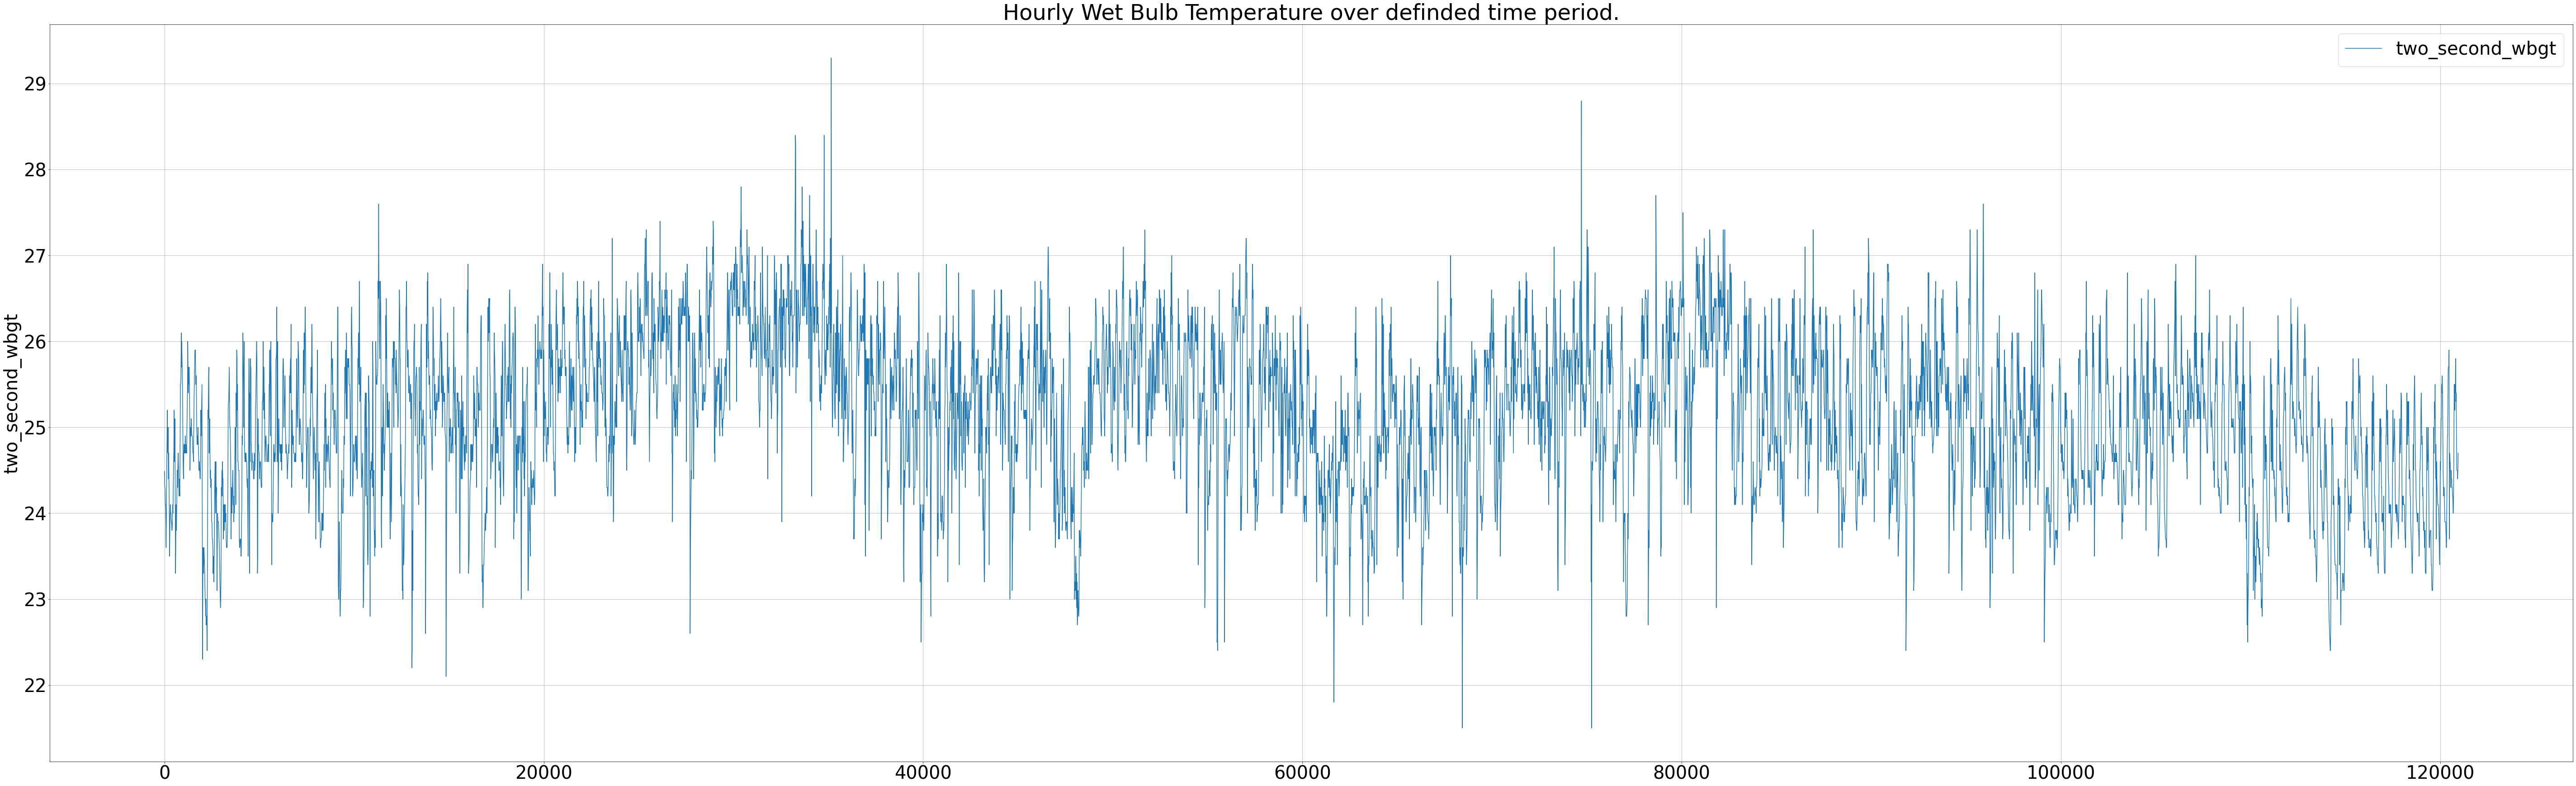

In [20]:
plt.rcParams.update({'font.size': 40})
df_calculated_two_seconds.plot(y='two_second_wbgt', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
plt.ylabel('two_second_wbgt')	
plt.show()

<AxesSubplot:>

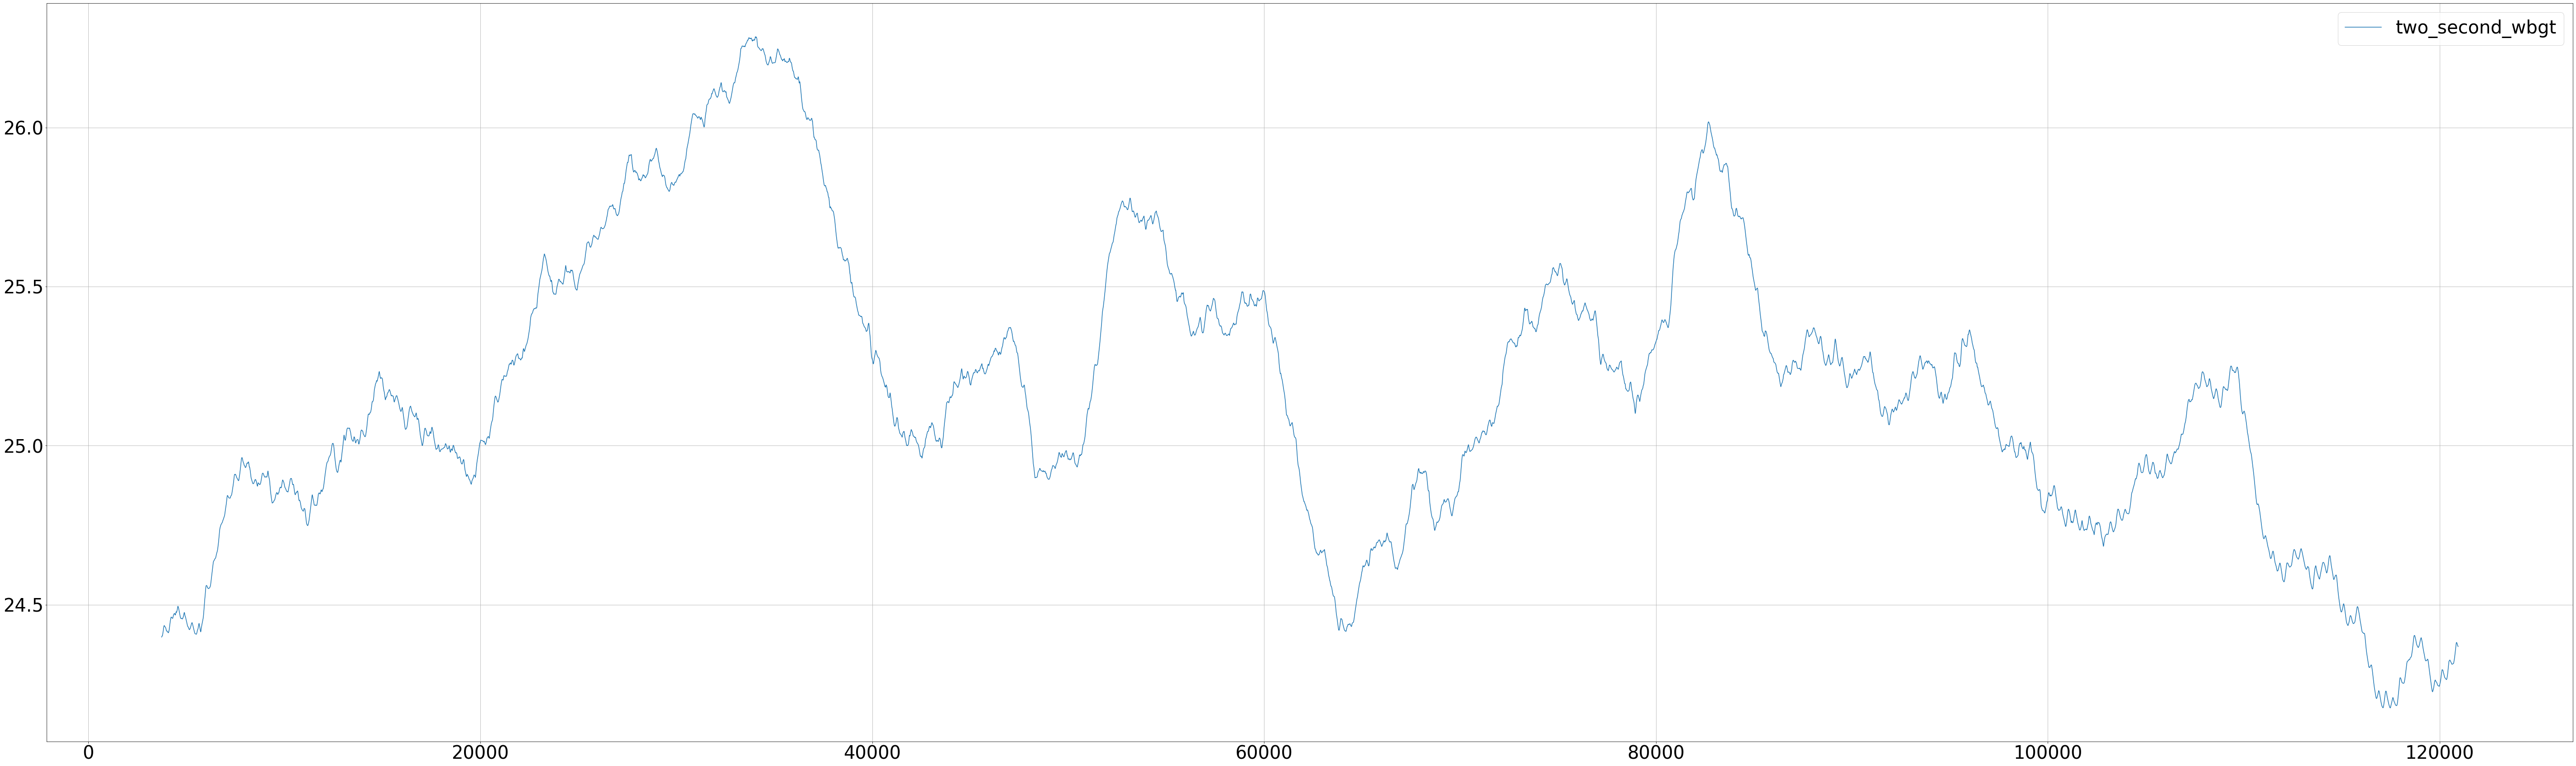

In [21]:
plt.rcParams.update({'font.size': 40})
#672 = 672 hours in one month
df_timeseries_mean = df_calculated_two_seconds.rolling(window=window_value).mean()
df_timeseries_mean.plot( figsize =(100,30), grid =True)

<AxesSubplot:>

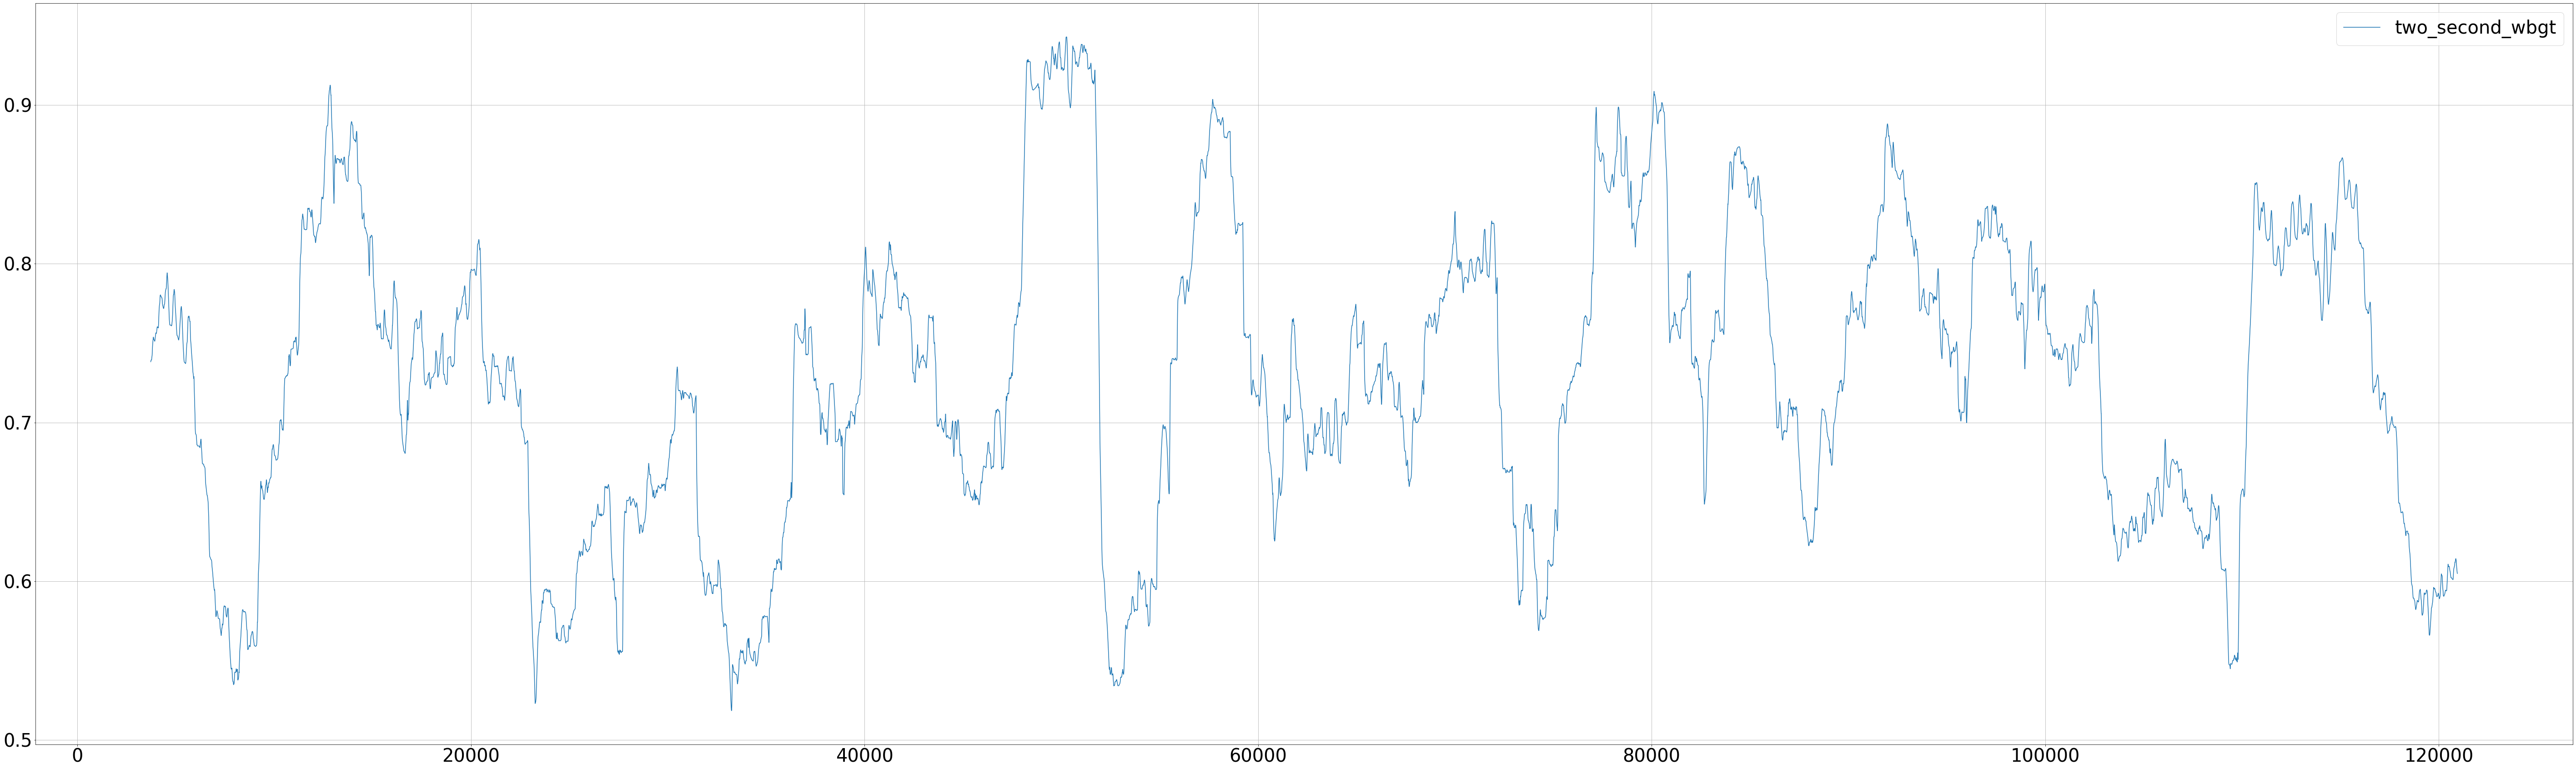

In [22]:
df_timeseries_std = df_calculated_two_seconds.rolling(window=window_value).std()
df_timeseries_std.plot( figsize =(100,30), grid =True)

In [23]:

# train_size = math.floor(0.8*df_calculated_two_seconds.size)
# test_size =math.floor(df_calculated_two_seconds.size)
# train = df_calculated_two_seconds.two_second_wbgt[0:train_size]
# test = df_calculated_two_seconds.two_second_wbgt[train_size:test_size]
NUMBER_OF_DAYS =1
NUMBER_OF_DATA_POINT =  math.floor((NUMBER_OF_DAYS * 86400)/2)
train_size = math.floor(0.8*NUMBER_OF_DATA_POINT)
test_size =math.floor(NUMBER_OF_DATA_POINT)
train = df_calculated_two_seconds.two_second_wbgt[0:train_size]
test = df_calculated_two_seconds.two_second_wbgt[train_size:test_size]
print('train size = ',train_size,'test size = ', test_size)

train size =  34560 test size =  43200


<AxesSubplot:title={'center':'Train data vs Test data.'}>

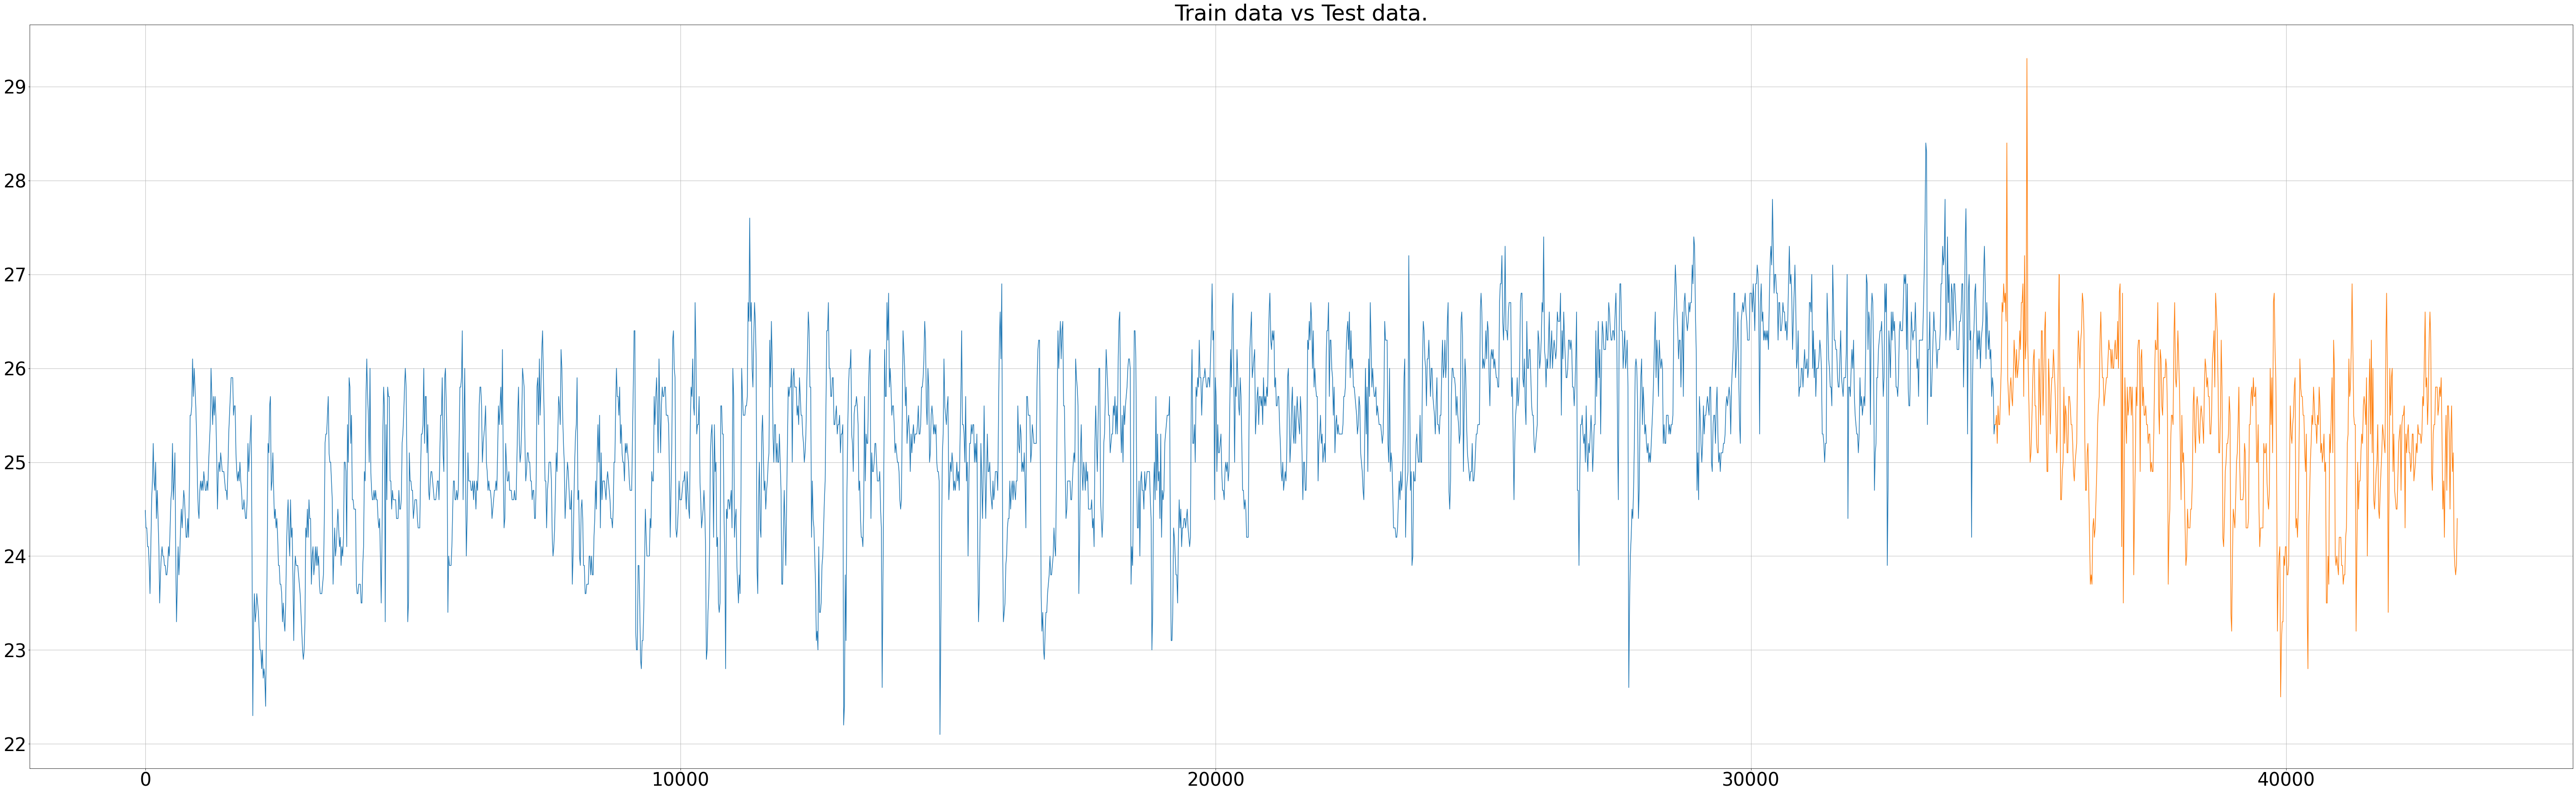

In [24]:
#plotting the data
train.plot()
test.plot(figsize =(100,30), grid =True,title='Train data vs Test data.')



In [25]:
#building the model
import pmdarima as pm
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-204581.937, Time=29.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-137250.010, Time=3.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-204529.535, Time=2.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-168030.796, Time=6.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-137251.988, Time=1.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-204619.094, Time=7.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-183330.896, Time=19.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-204574.677, Time=1.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-204660.470, Time=22.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-191403.697, Time=23.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-204621.796, Time=33.83 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-204703.335, Time=37.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-195777.088, Time=32.88 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-204669.599

ARIMA(order=(1, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
model_seasonal = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True)
model_seasonal.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-204581.937, Time=28.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-137250.010, Time=3.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-204529.535, Time=2.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-168030.796, Time=5.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-137251.988, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-204619.094, Time=6.88 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-183330.896, Time=18.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-204574.677, Time=1.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-204660.470, Time=20.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-191403.697, Time=24.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-204621.796, Time=32.66 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-204703.335, Time=34.06 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-195777.088, Time=30.89 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-204669.599

ARIMA(order=(1, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
# make your forecasts
forecasts = model.predict(test.shape[0])

In [28]:
forecasts_seasonal = model_seasonal.predict(test.shape[0])

In [29]:
forecasts

array([25.40609506, 25.41164518, 25.41667827, ..., 25.45955612,
       25.45955612, 25.45955612])

In [30]:
forecasts_seasonal

array([25.40609506, 25.41164518, 25.41667827, ..., 25.45955612,
       25.45955612, 25.45955612])

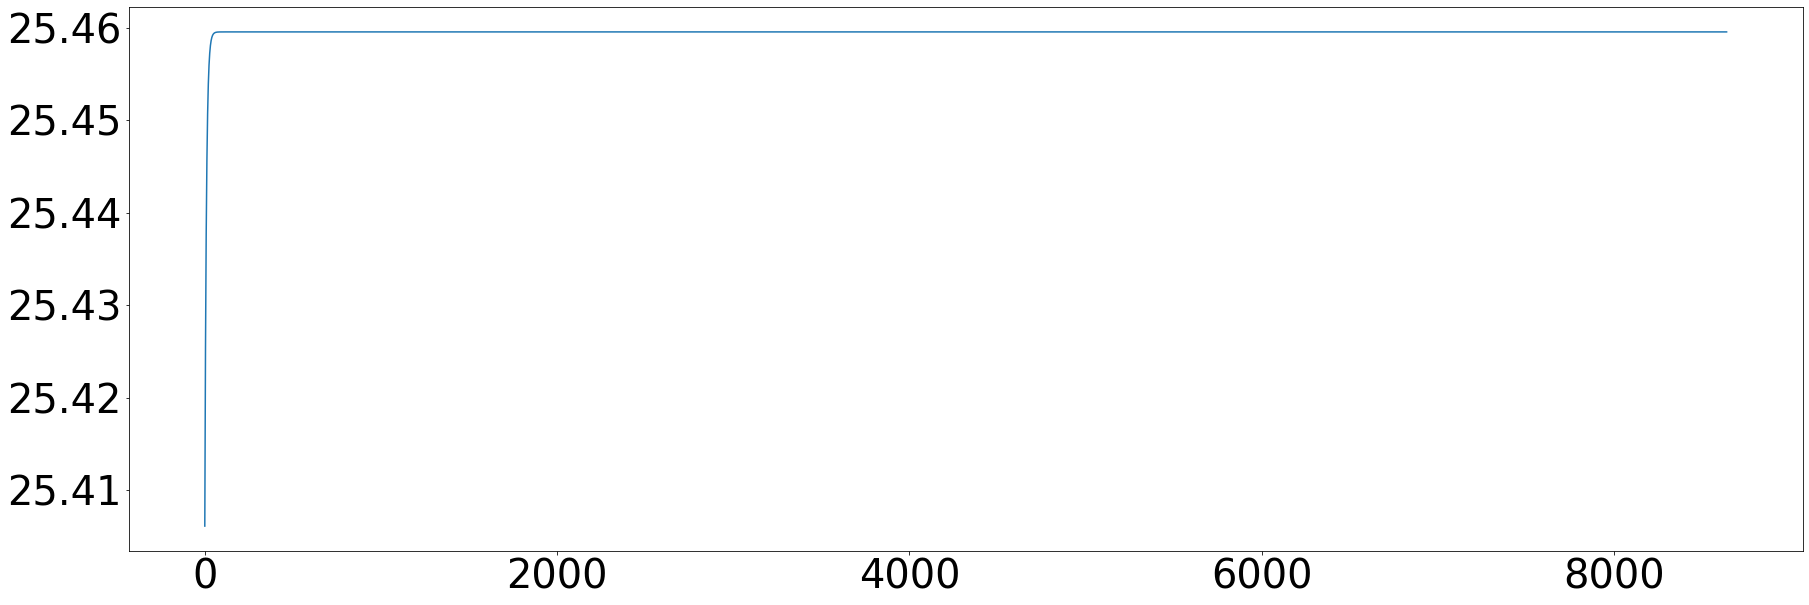

In [31]:
plt.figure(figsize=(30,10))
plt.plot(forecasts,label='forcast')
# plt.xlim([0, 50])
plt.show()

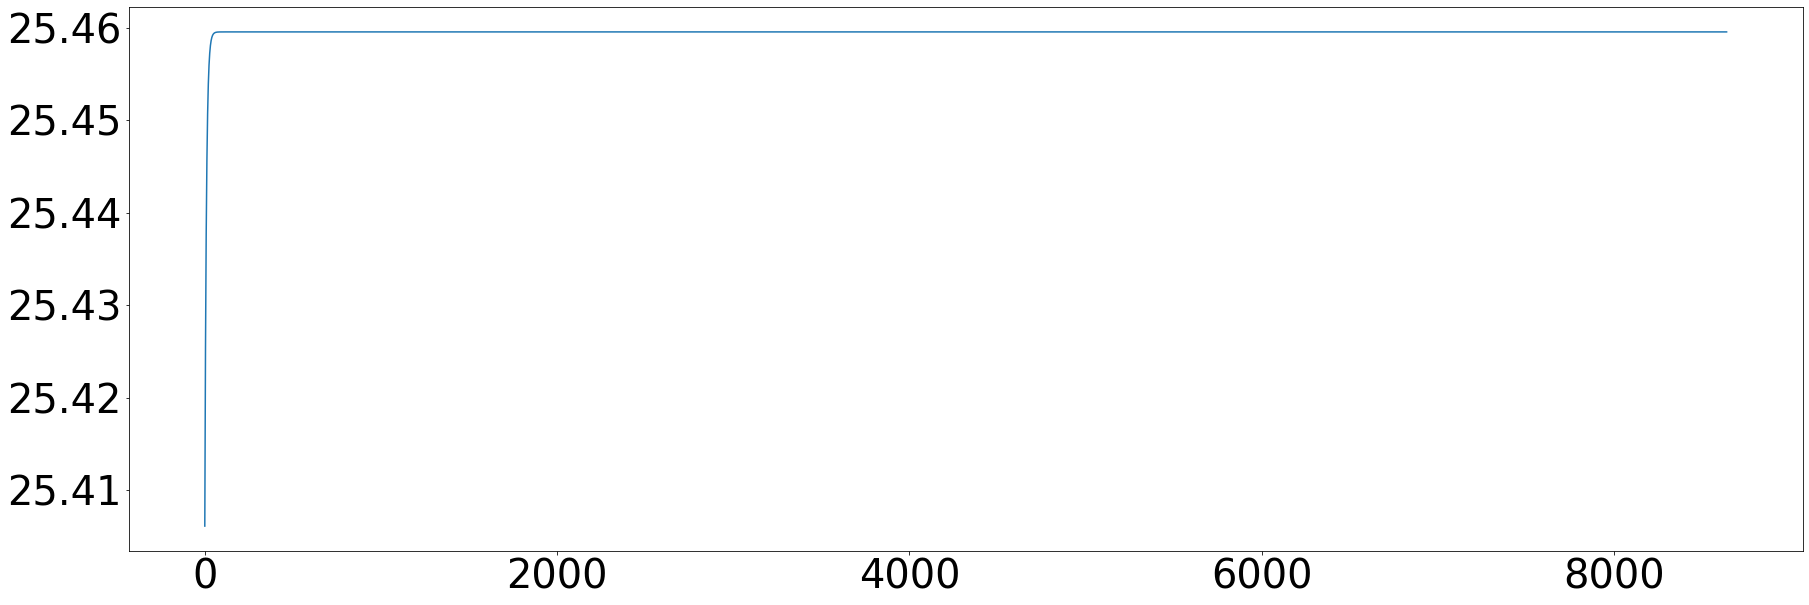

In [32]:
plt.figure(figsize=(30,10))
plt.plot(forecasts_seasonal,label='forcast')
#  plt.xlim([0, 50])
plt.show()

In [33]:
forecasts.size

8640

In [34]:
forecasts_seasonal.size

8640

## SES Forecast

In [36]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

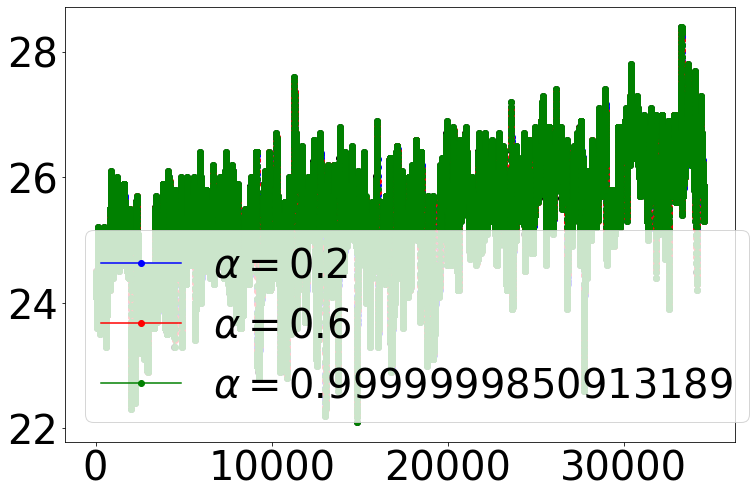

In [37]:
fit1 = SimpleExpSmoothing(train, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(train, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(train, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8))
plt.plot(train, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

## Holt